In [1]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
      temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
      globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
      globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?
yes


In [0]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [0]:
CONFIGURATION='paper_configuration'

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = False

Training on GPU!


## Generating a dataset

In [0]:
datagenerator = DataGenerator(default_conf[CONFIGURATION]['experiment_params']['dimx'],
                              default_conf[CONFIGURATION]['experiment_params']['dimy'],
                              default_conf[CONFIGURATION]['experiment_params']['range_x'],
                              default_conf[CONFIGURATION]['experiment_params']['dim_observation']
                              )
trainloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_train'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_train'])

valiloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_vali'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_vali'])

In [0]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf[CONFIGURATION]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.6784862279891968
True
 Validation loss after 0 equals 0.9057705998420715
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'empty', 'plot_run', 'plot_training_progress']


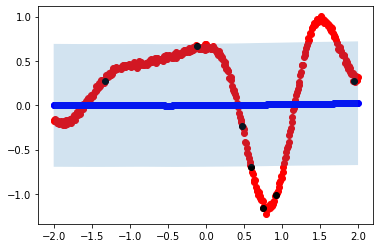

  2%|▏         | 4993/200000 [00:48<30:42, 105.84it/s]

Mean loss at epoch 5000 : 0.741890549659729
True
 Validation loss after 5000 equals 0.882178783416748
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'empty', 'plot_run', 'plot_training_progress']


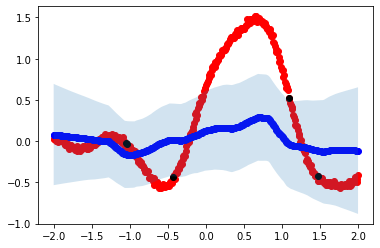

  5%|▍         | 9990/200000 [01:37<28:59, 109.25it/s]

Mean loss at epoch 10000 : 1.1278719902038574
True
 Validation loss after 10000 equals 0.8835973143577576
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'empty', 'plot_run', 'plot_training_progress']


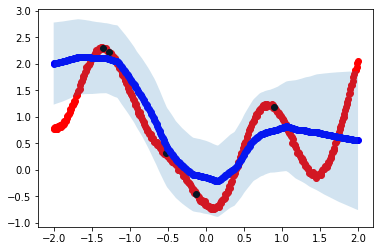

  7%|▋         | 14998/200000 [02:25<30:38, 100.65it/s]

Mean loss at epoch 15000 : 0.6412875056266785
True
 Validation loss after 15000 equals 0.5594585537910461
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'empty', 'plot_run', 'plot_training_progress']


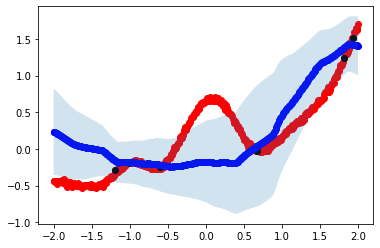

 10%|▉         | 19990/200000 [03:14<27:51, 107.70it/s]

Mean loss at epoch 20000 : 0.5195344686508179
True
 Validation loss after 20000 equals 0.6679404377937317
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'empty', 'plot_run', 'plot_training_progress']


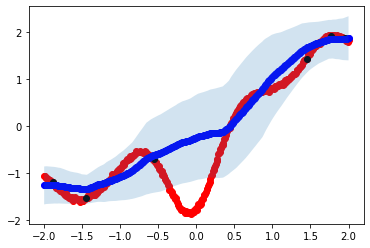

 12%|█▏        | 23367/200000 [03:47<28:39, 102.75it/s]

KeyboardInterrupt: ignored

In [7]:
model_weights = trainer.run_training(**default_conf[CONFIGURATION]['data_gen_params'], valiloader=None, plotting=True)